In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('board2.csv')

In [4]:
df

,Name,Gender,Track,Hometown,Math,Electronics,GEAS,Communication
0,S1,Male,Instrumentation,Luzon,58,89,75,78
1,S2,Female,Communication,Mindanao,52,75,90,52
2,S3,Female,Instrumentation,Mindanao,83,74,77,57
3,S4,Male,Instrumentation,Visayas,65,58,91,68
4,S5,Male,Communication,Luzon,59,86,43,88
5,S6,Female,Microelectronics,Visayas,88,45,86,83
6,S7,Female,Instrumentation,Luzon,66,60,60,48
7,S8,Male,Instrumentation,Luzon,49,81,64,53
8,S9,Male,Instrumentation,Luzon,50,36,63,42
9,S10,Male,Microelectronics,Mindanao,80,84,61,44


In [8]:
df.describe()

,Math,Electronics,GEAS,Communication
count,30.000000,30.00000,30.000000,30.000000
mean,72.166667,61.60000,71.866667,61.966667
std,12.660237,17.29381,15.725519,15.376837
min,48.000000,35.00000,40.000000,41.000000
25%,64.250000,47.00000,61.250000,49.000000
50%,73.500000,60.00000,76.000000,60.000000
75%,83.000000,76.50000,83.750000,72.750000
max,89.000000,91.00000,94.000000,88.000000


In [16]:
Vis = df.loc[(df['Hometown'] == 'Visayas') & (df['Math'] < 70), ['Name', 'Gender', 'Track', 'Math']]

In [17]:
Vis

,Name,Gender,Track,Math
3,S4,Male,Instrumentation,65
10,S11,Female,Communication,48
21,S22,Female,Communication,64


In [51]:
Instru = df.loc[(df['Hometown'] == 'Luzon') & (df['Track'] == 'Instrumentation')& (df['Electronics'] > 70), ['Name', 'GEAS', 'Electronics']]

In [52]:
Instru

,Name,GEAS,Electronics
0,S1,75,89
7,S8,64,81
29,S30,57,81


In [31]:
df['Average'] = (df['Math'] + df['Electronics'] + df['GEAS'] + df['Communication']) / 4

In [32]:
Mindy = df.loc[(df['Gender'] == 'Female') & (df['Hometown'] == 'Mindanao') & (df['Average'] >= 55), ['Name', 'Track', 'Electronics','Average']]

In [33]:
Mindy

,Name,Track,Electronics,Average
1,S2,Communication,75,67.25
2,S3,Instrumentation,74,72.75
14,S15,Microelectronics,41,59.00
16,S17,Microelectronics,79,70.50
19,S20,Communication,60,66.50


In [34]:
import matplotlib.pyplot as plt

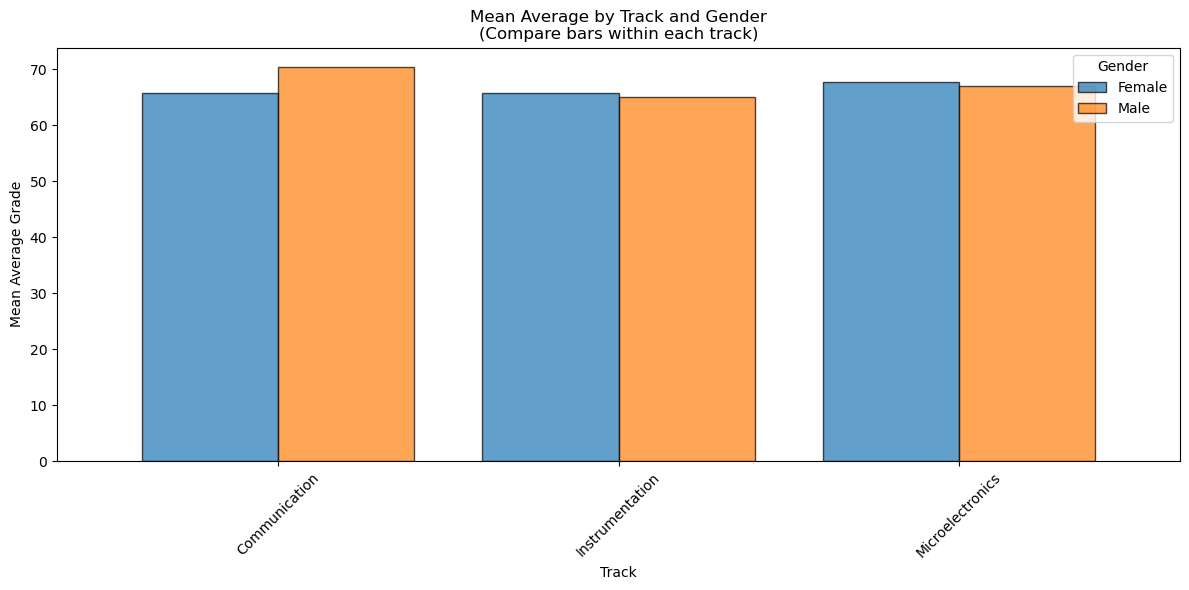

In [41]:
track_gender_avg = df.groupby(['Track', 'Gender'])['Average'].mean().unstack(fill_value=0)
plt.figure(figsize=(12, 6))
track_gender_avg.plot(kind='bar', ax=plt.gca(), width=0.8, alpha=0.7, edgecolor='black')
plt.xlabel('Track')
plt.ylabel('Mean Average Grade')
plt.title('Mean Average by Track and Gender\n(Compare bars within each track)')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

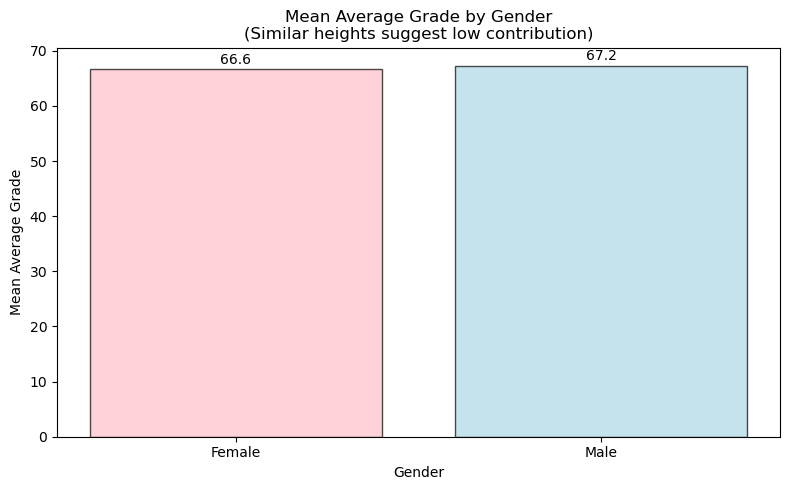

In [47]:
gender_avg = df.groupby('Gender')['Average'].mean()
plt.figure(figsize=(8, 5))
bars = plt.bar(gender_avg.index, gender_avg.values, color=['pink', 'lightblue'], alpha=0.7, edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Mean Average Grade')
plt.title('Mean Average Grade by Gender\n(Similar heights suggest low contribution)')
for bar, value in zip(bars, gender_avg.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value:.1f}', 
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

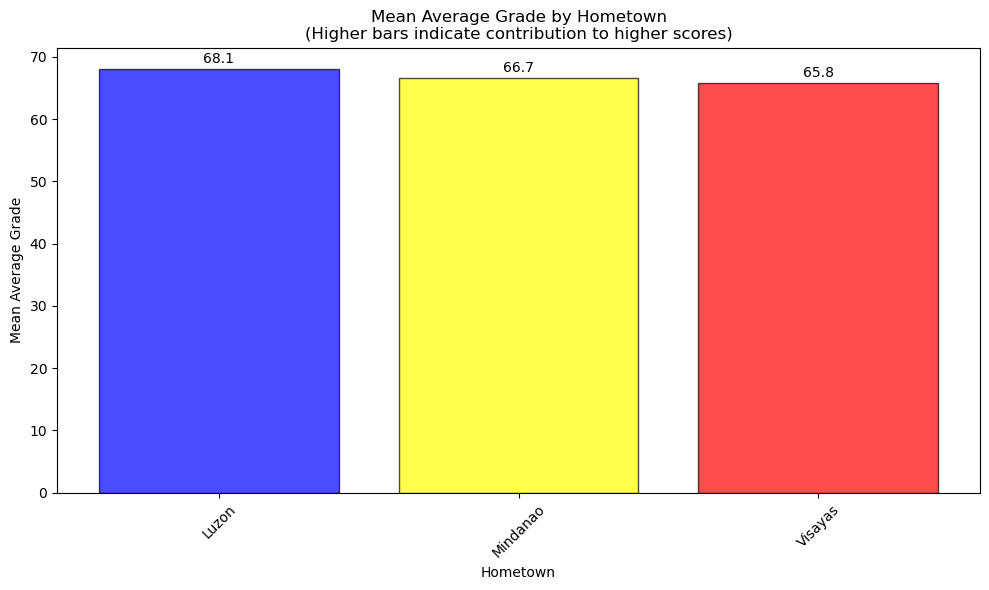

In [45]:
hometown_avg = df.groupby('Hometown')['Average'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
bars = plt.bar(hometown_avg.index, hometown_avg.values, color=['Blue', 'yellow', 'Red'], alpha=0.7, edgecolor='black')
plt.xlabel('Hometown')
plt.ylabel('Mean Average Grade')
plt.title('Mean Average Grade by Hometown\n(Higher bars indicate contribution to higher scores)')
plt.xticks(rotation=45)
for bar, value in zip(bars, hometown_avg.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, f'{value:.1f}', 
             ha='center', va='bottom')
plt.tight_layout()
plt.show()